# 1 Imports

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image,display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow import keras
import os
import datetime


# 1.0 module not found

In [9]:
# !pip install --upgrade pip
# !pip install pandas
# !pip install matplotlib
# !pip install -U scikit-learn
# !pip install matplotlib
# !pip install tensorflow

In [5]:
df = pd.read_csv("../data/USD-EGP Time series Data - Sheet1.csv")
df.head()

,Date,Close,Date.1,Close.1,Date.2,Close.2
0,12/1/2003 23:58:00,6.1070,12/1/2003 23:58:00,7.304583,12/1/2003 23:58:00,10.494269
1,12/2/2003 23:58:00,6.0749,12/2/2003 23:58:00,7.340909,12/2/2003 23:58:00,10.505325
2,12/3/2003 23:58:00,6.1057,12/3/2003 23:58:00,7.398887,12/3/2003 23:58:00,10.545154
3,12/4/2003 23:58:00,6.1161,12/4/2003 23:58:00,7.384579,12/4/2003 23:58:00,10.519692
4,12/5/2003 23:58:00,6.1088,12/5/2003 23:58:00,7.441740,12/5/2003 23:58:00,10.580442


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     6218 non-null   object 
 1   Close    6218 non-null   float64
 2   Date.1   6216 non-null   object 
 3   Close.1  6216 non-null   float64
 4   Date.2   6216 non-null   object 
 5   Close.2  6216 non-null   float64
dtypes: float64(3), object(3)
memory usage: 291.6+ KB


# 2.0 Data cleaning

In [7]:
df["Date"] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S')
df["Date.1"] = pd.to_datetime(df['Date.1'], format='%m/%d/%Y %H:%M:%S')
df["Date.2"] = pd.to_datetime(df['Date.2'], format='%m/%d/%Y %H:%M:%S')


df.rename(columns = {"Close" : "USD","Close.1":"EUR","Close.2":"GBP"},inplace = True)
df.head()

,Date,USD,Date.1,EUR,Date.2,GBP
0,2003-12-01 23:58:00,6.1070,2003-12-01 23:58:00,7.304583,2003-12-01 23:58:00,10.494269
1,2003-12-02 23:58:00,6.0749,2003-12-02 23:58:00,7.340909,2003-12-02 23:58:00,10.505325
2,2003-12-03 23:58:00,6.1057,2003-12-03 23:58:00,7.398887,2003-12-03 23:58:00,10.545154
3,2003-12-04 23:58:00,6.1161,2003-12-04 23:58:00,7.384579,2003-12-04 23:58:00,10.519692
4,2003-12-05 23:58:00,6.1088,2003-12-05 23:58:00,7.441740,2003-12-05 23:58:00,10.580442


#### some dates dont match on all currencies

In [8]:
n1 = set(df["Date"])
n2 = set(df["Date.1"])
n3 = set(df["Date.2"])

uncommon = {*(n1^n2), *(n1^n3) , *(n2^n3)}
len(uncommon)

3

In [9]:
common = list(set(df["Date"]) & set(df["Date.1"]) & set(df["Date.2"]))
len(common)

6216

In [10]:
df_clean = pd.DataFrame({"Date": df["Date"],"USD":None,"EUR":None,"GBP":None})
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6218 non-null   datetime64[ns]
 1   USD     0 non-null      object        
 2   EUR     0 non-null      object        
 3   GBP     0 non-null      object        
dtypes: datetime64[ns](1), object(3)
memory usage: 194.4+ KB


In [11]:
df_clean.set_index("Date")

,USD,EUR,GBP
Date,,,
2003-12-01 23:58:00,None,None,None
2003-12-02 23:58:00,None,None,None
2003-12-03 23:58:00,None,None,None
2003-12-04 23:58:00,None,None,None
2003-12-05 23:58:00,None,None,None
...,...,...,...
2023-03-04 23:58:00,None,None,None
2023-03-05 23:58:00,None,None,None
2023-03-06 23:58:00,None,None,None


#### reorder each currency row by its correct date
else set it as null

In [12]:
def cln1(df,date,st,dt):
    for i,g in zip(df[dt].values,df[st].values):
        if i == date:
            return g
    return None


for i in range(6218):
    
    x = df_clean["Date"][i]
    
    us =  cln1(df,x,"USD","Date") 
    eu = cln1(df,x,"EUR","Date.1") 
    gb = cln1(df,x,"GBP","Date.2")
    
    df_clean['USD'][i] = us
    df_clean['EUR'][i] = eu
    df_clean['GBP'][i] = gb
    
df_clean

/tmp/ipykernel_230/1163110690.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['USD'][i] = us
/tmp/ipykernel_230/1163110690.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['EUR'][i] = eu
/tmp/ipykernel_230/1163110690.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['GBP'][i] = gb


,Date,USD,EUR,GBP
0,2003-12-01 23:58:00,6.107,7.304583,10.494269
1,2003-12-02 23:58:00,6.0749,7.340909,10.505325
2,2003-12-03 23:58:00,6.1057,7.398887,10.545154
3,2003-12-04 23:58:00,6.1161,7.384579,10.519692
4,2003-12-05 23:58:00,6.1088,7.44174,10.580442
...,...,...,...,...
6213,2023-03-04 23:58:00,30.7225,32.721,36.93324
6214,2023-03-05 23:58:00,30.79377,32.721,37.04362
6215,2023-03-06 23:58:00,30.8255,32.942,37.07347
6216,2023-03-07 23:58:00,30.7281,32.417,36.34101


#### replace each null value 
by the average of the cell before it and after it.<br>if null it would take the cell before that or after that.

In [13]:
def cln2(df,col):
    for i in range(df_clean.shape[0]):
        if df_clean[col][i] == None:
            
            x1 = df_clean[col][i]
            x2 = df_clean[col][i]
            c1 = 1
            c2 = 1
            
            while(x2 == None):
                x2= df_clean[col][i+c2]
                c2 = c2+1  
                
            while(x1 == None):
                x1= df_clean[col][i-c1]
                c1 = c1+1
            print(df_clean[col][i],col,i)
            df_clean[col][i] = (x1+x2)/2
        
cln2(df_clean,"GBP")
cln2(df_clean,"EUR")

None GBP 3465
None GBP 3526
None EUR 3465
None EUR 3526


/tmp/ipykernel_230/4285695170.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col][i] = (x1+x2)/2


In [14]:
df_clean[["USD","EUR","GBP"]].max(),df_clean[["USD","EUR","GBP"]].min()

(USD     30.8818
 EUR      33.256
 GBP    37.41106
 dtype: object,
 USD      5.1939
 EUR    6.462902
 GBP    7.535949
 dtype: object)

#### Save and reuse 

In [76]:
df_clean.to_csv("../data/USD-EUR-GBP to EGP Time series Data clean.csv",index = False)

NameError: name 'df_clean' is not defined

In [6]:
df = pd.read_csv("../data/USD-EUR-GBP to EGP Time series Data clean.csv",index_col='Date')
df.index = pd.to_datetime(df.index)
df[["USD","EUR","GBP"]] =  df[["USD","EUR","GBP"]].apply(pd.to_numeric)

# 3.0 Data improvment
#### only take data from dates after 2016, as it is more representing of current data.

In [7]:
df = df.loc[datetime.date(year=2016,month=1,day=1):]
df.index

DatetimeIndex(['2016-01-01 23:58:00', '2016-01-02 23:58:00',
               '2016-01-03 23:58:00', '2016-01-04 23:58:00',
               '2016-01-05 23:58:00', '2016-01-06 23:58:00',
               '2016-01-07 23:58:00', '2016-01-08 23:58:00',
               '2016-01-09 23:58:00', '2016-01-10 23:58:00',
               ...
               '2023-02-27 23:58:00', '2023-02-28 23:58:00',
               '2023-03-01 23:58:00', '2023-03-02 23:58:00',
               '2023-03-03 23:58:00', '2023-03-04 23:58:00',
               '2023-03-05 23:58:00', '2023-03-06 23:58:00',
               '2023-03-07 23:58:00', '2023-03-08 23:58:00'],
              dtype='datetime64[ns]', name='Date', length=2623, freq=None)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2623 entries, 2016-01-01 23:58:00 to 2023-03-08 23:58:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USD     2623 non-null   float64
 1   EUR     2623 non-null   float64
 2   GBP     2623 non-null   float64
dtypes: float64(3)
memory usage: 82.0 KB


#### scale each column with global minimum and maximum

In [53]:
scaler = MinMaxScaler(feature_range = (0,1))

scaler.data_min_ = min(df.min())
scaler.data_max_ = max(df.max())

df_scaled = scaler.fit_transform(df)
df_scaled
df["USDs"] = df_scaled[:,0]
df["EURs"] = df_scaled[:,1]
df["GBPs"] = df_scaled[:,2]


In [54]:
df.index

DatetimeIndex(['2016-01-01 23:58:00', '2016-01-02 23:58:00',
               '2016-01-03 23:58:00', '2016-01-04 23:58:00',
               '2016-01-05 23:58:00', '2016-01-06 23:58:00',
               '2016-01-07 23:58:00', '2016-01-08 23:58:00',
               '2016-01-09 23:58:00', '2016-01-10 23:58:00',
               ...
               '2023-02-27 23:58:00', '2023-02-28 23:58:00',
               '2023-03-01 23:58:00', '2023-03-02 23:58:00',
               '2023-03-03 23:58:00', '2023-03-04 23:58:00',
               '2023-03-05 23:58:00', '2023-03-06 23:58:00',
               '2023-03-07 23:58:00', '2023-03-08 23:58:00'],
              dtype='datetime64[ns]', name='Date', length=2623, freq=None)

In [55]:
df.iloc[:2098,:]

,USD,EUR,GBP,USDs,EURs,GBPs
Date,,,,,,
2016-01-01 23:58:00,7.71420,8.377621,11.373045,0.002939,0.001905,0.025595
2016-01-02 23:58:00,7.71420,8.341133,11.360934,0.002939,0.000441,0.025142
2016-01-03 23:58:00,7.71990,8.376863,11.374501,0.003185,0.001875,0.025650
2016-01-04 23:58:00,7.81040,8.453977,11.489098,0.007080,0.004969,0.029938
2016-01-05 23:58:00,7.80730,8.392848,11.456198,0.006946,0.002516,0.028707
...,...,...,...,...,...,...
2021-09-25 23:58:00,15.67307,18.394000,21.467250,0.345464,0.403752,0.403345
2021-09-26 23:58:00,15.66000,18.394000,21.448230,0.344902,0.403752,0.402633
2021-09-27 23:58:00,15.67770,18.374000,21.525180,0.345663,0.402950,0.405513


#### split into traning and testing

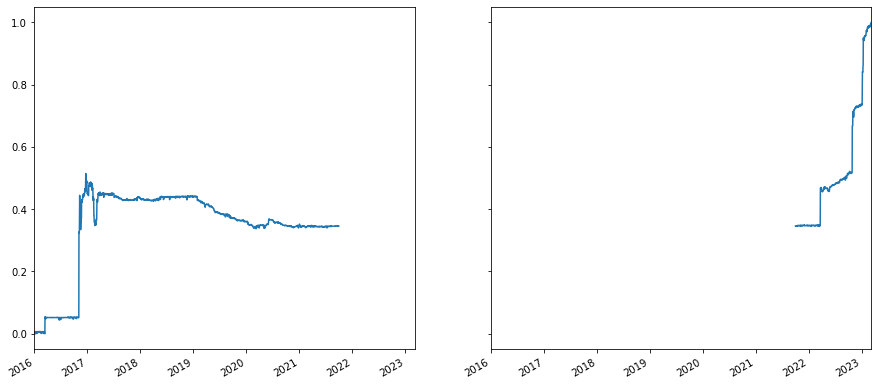

In [56]:


fig, (ax1,ax2) = plt.subplots(1,2, sharey = True,figsize = (15,7))

ax1.plot(df.iloc[:2098,:].index.to_pydatetime() ,df.iloc[:2098,:][["USDs"]]);
ax2.plot(df.iloc[2098:,:].index.to_pydatetime() ,df.iloc[2098:,:][["USDs"]]);
fig.autofmt_xdate()

ax1.set_xlim([datetime.date(2016, 1, 1), datetime.date(2023, 3, 8)]);
ax2.set_xlim([datetime.date(2016, 1, 1), datetime.date(2023, 3, 8)]);

In [57]:
df

,USD,EUR,GBP,USDs,EURs,GBPs
Date,,,,,,
2016-01-01 23:58:00,7.71420,8.377621,11.373045,0.002939,0.001905,0.025595
2016-01-02 23:58:00,7.71420,8.341133,11.360934,0.002939,0.000441,0.025142
2016-01-03 23:58:00,7.71990,8.376863,11.374501,0.003185,0.001875,0.025650
2016-01-04 23:58:00,7.81040,8.453977,11.489098,0.007080,0.004969,0.029938
2016-01-05 23:58:00,7.80730,8.392848,11.456198,0.006946,0.002516,0.028707
...,...,...,...,...,...,...
2023-03-04 23:58:00,30.72250,32.721000,36.933240,0.993144,0.978536,0.982119
2023-03-05 23:58:00,30.79377,32.721000,37.043620,0.996211,0.978536,0.986250
2023-03-06 23:58:00,30.82550,32.942000,37.073470,0.997577,0.987403,0.987367


In [58]:
x = df_scaled
y = df_scaled[:,0]

In [59]:
x[:3]

array([[0.00293942, 0.00190521, 0.02559548],
       [0.00293942, 0.00044134, 0.02514224],
       [0.00318473, 0.00187481, 0.02564995]])

In [60]:
y[:3]

array([0.00293942, 0.00293942, 0.00318473])

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state = 100, shuffle = False)

In [62]:
x_train.shape

(2098, 3)

In [63]:
x_test.shape

(525, 3)

In [64]:
y_train.shape

(2098,)

In [65]:
y_test.shape

(525,)

# 3.0 Modeling

#### Create generator for testing and tranning

In [66]:
days_found = 9
days_to_find =1
days = days_to_find + days_found
train_generator = TimeseriesGenerator(x_train,y_train,length = days, sampling_rate= 1,batch_size = 10)
test_generator = TimeseriesGenerator(x_test,y_test,length = days, sampling_rate= 1,batch_size = 10)

#### Model 

In [241]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128 , input_shape = (days,3),return_sequences =True))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.LSTM(128 , return_sequences = True))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(32 , return_sequences = False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))

In [242]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_41 (LSTM)              (None, 10, 128)           67584     
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 10, 128)           0         
                                                                 
 lstm_42 (LSTM)              (None, 10, 128)           131584    
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 10, 128)           0         
                                                                 
 dropout_24 (Dropout)        (None, 10, 128)           0         
                                                                 
 lstm_43 (LSTM)              (None, 32)                20608     
                                                                 
 dropout_25 (Dropout)        (None, 32)              

#### Early stoppning function in case of a bad model

In [243]:
stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 5, mode= "min")


model.compile(
            loss = tf.losses.MeanAbsoluteError(),
            optimizer = tf.optimizers.Adagrad(),
            metrics = [tf.metrics.MeanAbsoluteError()]
             ) 

In [244]:

history = model.fit_generator(train_generator, epochs = 30, validation_data = test_generator,
                             shuffle = False
,                             callbacks = [stop])
            

Epoch 1/30


C:\Users\Mgala\AppData\Local\Temp/ipykernel_19672/3422703389.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 30, validation_data = test_generator,


209/209 [==============================] - 13s 35ms/step - loss: 0.1324 - mean_absolute_error: 0.1324 - val_loss: 0.1777 - val_mean_absolute_error: 0.1777
Epoch 2/30
209/209 [==============================] - 3s 15ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - val_loss: 0.1702 - val_mean_absolute_error: 0.1702
Epoch 3/30
209/209 [==============================] - 3s 15ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - val_loss: 0.1707 - val_mean_absolute_error: 0.1707
Epoch 4/30
209/209 [==============================] - 4s 18ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - val_loss: 0.1610 - val_mean_absolute_error: 0.1610
Epoch 5/30
209/209 [==============================] - 4s 21ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - val_loss: 0.1584 - val_mean_absolute_error: 0.1584
Epoch 6/30
209/209 [==============================] - 4s 18ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - val_loss: 0.1534 - val_mean_absolute_error: 0.1534
Epoch 7/30
209/209 [

In [245]:
model.metrics_names

['loss', 'mean_absolute_error']

In [246]:
model.evaluate_generator(test_generator, verbose = 0)

C:\Users\Mgala\AppData\Local\Temp/ipykernel_19672/1828663309.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose = 0)


[0.09313519299030304, 0.09313519299030304]

In [247]:
predictions = model.predict_generator(test_generator)

C:\Users\Mgala\AppData\Local\Temp/ipykernel_19672/2745777454.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


In [248]:
predictions.shape[0]

515

In [249]:
x_test[:,1:][30:]

array([[0.39456471, 0.40451673],
       [0.39456471, 0.40473079],
       [0.39805506, 0.40419153],
       [0.39504614, 0.39964434],
       [0.39869696, 0.40613038],
       [0.39356173, 0.3935385 ],
       [0.39440423, 0.39298802],
       [0.39440423, 0.39298802],
       [0.39440423, 0.39247496],
       [0.39705208, 0.39827767],
       [0.39649042, 0.39691849],
       [0.38922889, 0.38795733],
       [0.38774448, 0.38615245],
       [0.38806544, 0.38967314],
       [0.38806544, 0.38967314],
       [0.38806544, 0.38985389],
       [0.38377271, 0.3899336 ],
       [0.37887819, 0.38887043],
       [0.38000152, 0.39395052],
       [0.38208771, 0.39335289],
       [0.37687225, 0.38915035],
       [0.37687225, 0.38915035],
       [0.37687225, 0.39019855],
       [0.37478606, 0.38816652],
       [0.37494654, 0.38682605],
       [0.37237892, 0.38419151],
       [0.37265975, 0.3830868 ],
       [0.37964045, 0.38497476],
       [0.37964045, 0.38497476],
       [0.37964045, 0.38663482],
       [0.

In [250]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][days:])] , axis = 1)

#### reverse the normilization
#### add the predicted values to the original values

In [251]:
rev_trans = scaler.inverse_transform(df_pred)

df_end = df[predictions.shape[0]*-1:]
df_end

,USD,EUR,GBP,USDs,EURs,GBPs
Date,,,,,,
2021-10-10 23:58:00,15.67450,18.163,21.38132,0.345526,0.394484,0.400129
2021-10-11 23:58:00,15.68770,18.161,21.36349,0.346094,0.394404,0.399462
2021-10-12 23:58:00,15.67880,18.115,21.33750,0.345711,0.392559,0.398489
2021-10-13 23:58:00,15.68460,18.224,21.47752,0.345960,0.396932,0.403729
2021-10-14 23:58:00,15.71880,18.222,21.48694,0.347432,0.396851,0.404082
...,...,...,...,...,...,...
2023-03-04 23:58:00,30.72250,32.721,36.93324,0.993144,0.978536,0.982119
2023-03-05 23:58:00,30.79377,32.721,37.04362,0.996211,0.978536,0.986250
2023-03-06 23:58:00,30.82550,32.942,37.07347,0.997577,0.987403,0.987367


In [252]:
df_end["USD-predict"] = rev_trans[:,0]

C:\Users\Mgala\AppData\Local\Temp/ipykernel_19672/337033914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end["USD-predict"] = rev_trans[:,0]


#### plot both

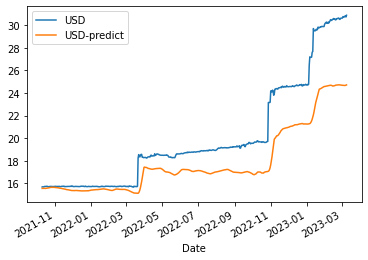

In [253]:
df_end[["USD","USD-predict"]].plot();

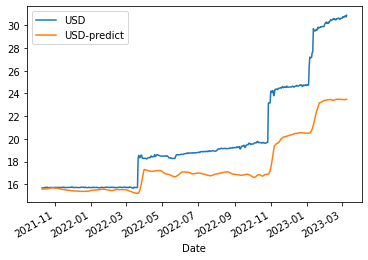

In [240]:
df_end[["USD","USD-predict"]].plot();